# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are constructed by forming decision nodes. Data can then be passed through these decision nodes to form a prediction. Each of these nodes are made up of certain variables, either categorical or numerical. The variables in each of these nodes represent a decision that the tree has to make to arrive at the prediction. For example, a node could consist of asking if the input is less than a certain numerical value or if it matches with a categorical variable. To construct these questions, the data needs to be "split" into groups. These groups either match the question at hand or do not. The question is determined by minimizing the impurity or entropy that will occur as a result, which is basically how correct the model will make predictions.
2. They handle non linear relationships by asking a question to each of the data points, and if they match the criteria the tree goes one way, and if it does not match, the tree goes to the other branch. This works very well for categorical variables because it boils down to a true or false question, and all categorical data can be represented as binary data through one hot encoding. This is much better than using a linear model for the same problem because linear models must alter the data significantly to acheive a result.
3.Gini is a good loss function for trees as it can look at the error from categorical data very well, (and for numerical data).
4. Trees can easily be overfit due to their structure and sometimes blunt outcomes (e.g. you fit a small set of criteria and the model 100% predicts your outcome)
5. False! Trees can work great with numerical variables.
6. Too many branches after a split causes the model to be overfit to the training data, and will no longer make accurate predictions.
7. You can look at the entropy of the data or construct the confusion matrix and calculate the accuracy.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [101]:
df = pd.read_csv("https://raw.githubusercontent.com/RyanErm/trees/refs/heads/main/assignment/data/Breast%20Cancer%20METABRIC.csv")
df.shape

(2509, 34)

There are 2509 observations and 34 variables

In [102]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [103]:
df = df.dropna()
tumor = df['Tumor Stage']
one_hot_tumor = pd.get_dummies(tumor)
chemo = df['Chemotherapy']
one_hot_chemo = pd.get_dummies(chemo)
type = df['Cancer Type Detailed']
one_hot_cancer = pd.get_dummies(type)

good_data= df[['Tumor Size', "Lymph nodes examined positive", "Age at Diagnosis"]]

X = pd.concat([good_data, one_hot_tumor, one_hot_chemo, one_hot_cancer], axis=1)
X.columns = X.columns.astype(str)
Y = df['Overall Survival Status']


In [104]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, Y, test_size=0.2, random_state=100)


cancer_tree = tree.DecisionTreeClassifier()
#rating_tree = tree.DecisionTreeClassifier(min_samples_leaf=100)
cancer_tree.fit(X_train_, y_train_)
y_hat = cancer_tree.predict(X_test_)

tab = pd.crosstab(y_test_,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test_)
specificity = (tab.iloc[1,1]/(tab.iloc[1,1]+tab.iloc[1,0]))
sensitivity = (tab.iloc[0,0]/(tab.iloc[1,0]+tab.iloc[0,0]))
print('Accuracy: ', acc)
print('Specificty: ', specificity)
print('Sensitivity: ', sensitivity)
pd.crosstab(y_test_,y_hat)

Accuracy:  0.5662100456621004
Specificty:  0.4857142857142857
Sensitivity:  0.5748031496062992


col_0,Deceased,Living
Overall Survival Status,,
Deceased,73,41
Living,54,51


The tree does better in terms of sensitivity than specificity

[Text(0.7191917267184036, 0.98, 'Age at Diagnosis <= 67.65\ngini = 0.491\nsamples = 873\nvalue = [494, 379]'),
 Text(0.601536516075388, 0.94, 'Lymph nodes examined positive <= 5.5\ngini = 0.497\nsamples = 598\nvalue = [276, 322]'),
 Text(0.6603641213968958, 0.96, 'True  '),
 Text(0.48577813192904656, 0.9, 'Age at Diagnosis <= 60.925\ngini = 0.489\nsamples = 539\nvalue = [229, 310]'),
 Text(0.3353658536585366, 0.86, 'Tumor Size <= 27.5\ngini = 0.47\nsamples = 401\nvalue = [151, 250]'),
 Text(0.2328159645232816, 0.82, 'Age at Diagnosis <= 53.94\ngini = 0.442\nsamples = 306\nvalue = [101.0, 205.0]'),
 Text(0.13802660753880266, 0.78, 'Age at Diagnosis <= 53.065\ngini = 0.406\nsamples = 194\nvalue = [55, 139]'),
 Text(0.13359201773835921, 0.74, 'Age at Diagnosis <= 52.62\ngini = 0.426\nsamples = 179\nvalue = [55.0, 124.0]'),
 Text(0.12472283813747229, 0.7, 'Age at Diagnosis <= 29.47\ngini = 0.407\nsamples = 172\nvalue = [49.0, 123.0]'),
 Text(0.12028824833702882, 0.66, 'gini = 0.0\nsamples 

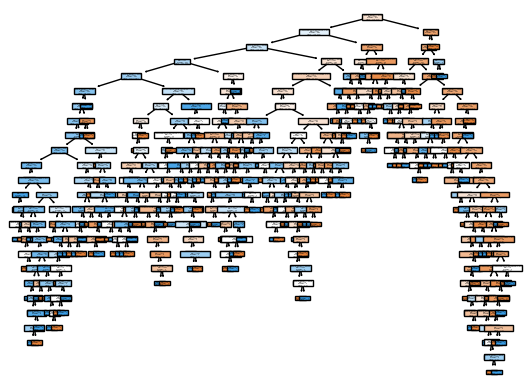

In [105]:
var_names = cancer_tree.feature_names_in_
plot_tree(cancer_tree,filled=True,feature_names=var_names)

In [106]:
Y = df['Overall Survival (Months)']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, Y, test_size=0.2, random_state=100)

for i in range(1, 25):
  cancer_tree = tree.DecisionTreeRegressor(min_samples_leaf=i)
  cancer_tree.fit(X_train_, y_train_)
  r_square = cancer_tree.score(X_test_, y_test_)
  print(str(i), str(r_square))

1 -0.6907352029644553
2 -0.5139325710299167
3 -0.2886296502723493
4 -0.2202139841403261
5 -0.22623256222507915
6 -0.16461984758650505
7 -0.1355694238495211
8 -0.08866469745626793
9 -0.10581273584412232
10 -0.09967198729409854
11 -0.0968678026787273
12 -0.0779689603244067
13 -0.00865106461569276
14 -0.019747356781573577
15 -0.0022144712683382917
16 0.0019512170682216556
17 -0.008505827122885945
18 -0.0095301220788504
19 0.0037189833848053633
20 0.0050175861346059
21 0.008379283548449301
22 -0.0003268459306549065
23 0.008732353258604442
24 0.026532963717491476


The largest r-square value, is for 1 minimum sample at each leaf, with an r square of ~0.7. I am taking the absolute value because it is returning negative for some reason.

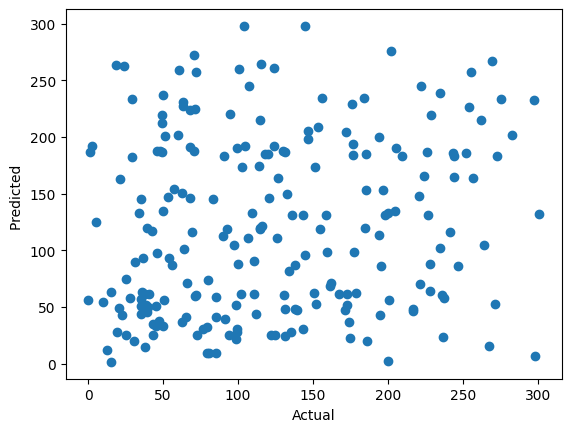

In [109]:
cancer_tree = tree.DecisionTreeRegressor(min_samples_leaf=1)
cancer_tree.fit(X_train_, y_train_)
y_hat = cancer_tree.predict(X_test_)
plt.scatter(x = y_test_, y = y_hat)
plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.show()

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/RyanErm/trees/refs/heads/main/assignment/data/corporate_ratings.csv")
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [4]:
df.shape

(2029, 31)

There are 2029 observations and 31 variables.

(array([4.940e+02, 0.000e+00, 0.000e+00, 1.463e+03, 0.000e+00, 0.000e+00,
        7.100e+01, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

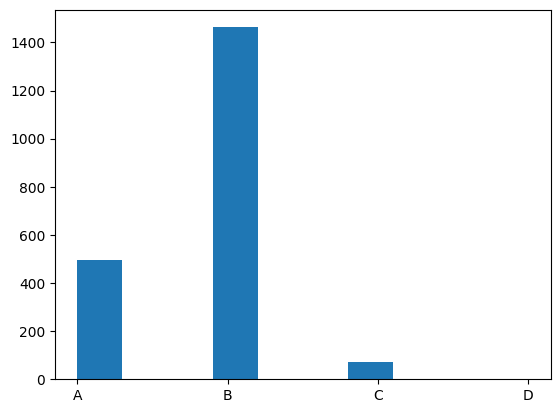

In [13]:
plt.hist(df['Rating'])

In [10]:
df["Rating"] = df['Rating'].replace(["AA", "AAA"], 'A')
df["Rating"] = df['Rating'].replace(["BB", "BBB"], 'B')
df["Rating"] = df['Rating'].replace(["CC", "CCC"], 'C')
df['Rating'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [39]:
#get the sector data
sector = df['Sector']
rating = df['Rating']
#drop sector and unwanted columns
good_columns = df.drop(['Rating',"Date", "Name", "Symbol", "Rating Agency Name", "Sector"], axis=1)
#one hot encode the sector data
one_hot_data =pd.get_dummies(sector)
#add all up together
X = pd.concat([good_columns, one_hot_data], axis = 1)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, rating, test_size=0.2, random_state=100)


#rating_tree = tree.DecisionTreeClassifier()
rating_tree = tree.DecisionTreeClassifier(min_samples_leaf=100)
rating_tree.fit(X_train_, y_train_)
y_hat = rating_tree.predict(X_test_)

tab = pd.crosstab(y_test_,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test_) # Compute Accuracy
print('Accuracy: ', acc)
pd.crosstab(y_test_,y_hat)

Accuracy:  0.7684729064039408


col_0,A,B
Rating,,
A,40,71
B,13,272
C,0,9
D,0,1


With no minimum samples for each leaf, the accuracy is around 70%, but as the argument changes so does the accuracy. For example, as the number increases the model stops predicting C as an outcome and never predicts D from the get go. But the accuracy goes up, for example when the minimum samples for each leaf is 100 the accuracy is around 77%!

In [62]:
#get the sector data
sector = df['Sector']
rating = df['Rating']
rating_agency = df['Rating Agency Name']
#drop sector and unwanted columns
good_columns = df.drop(['Rating',"Date", "Name", "Symbol", "Sector", "Rating Agency Name"], axis=1)
#one hot encode the sector data
one_hot_data =pd.get_dummies(sector)
one_hot_data2 = pd.get_dummies(rating_agency)
#add all up together
X = pd.concat([good_columns, one_hot_data, one_hot_data2], axis = 1)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, rating, test_size=0.2, random_state=100)


rating_tree = tree.DecisionTreeClassifier()
#rating_tree = tree.DecisionTreeClassifier(min_samples_leaf=100)
rating_tree.fit(X_train_, y_train_)
y_hat = rating_tree.predict(X_test_)

tab = pd.crosstab(y_test_,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test_) # Compute Accuracy
print('Accuracy: ', acc)
pd.crosstab(y_test_,y_hat)

Accuracy:  0.7512315270935961


col_0,A,B,C
Rating,,,
A,68,43,0
B,32,237,16
C,0,5,4
D,0,0,1


When the rating agency is included the accuracy does increase at the same amount of minimum samples per leaf. I interpret this as more data being included in the model so it is more accurate.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?